# Tutorial 02: Creating custom environments in PyCIGAR

This tutorial walks through the process of creating custom environments in PyCIGAR. It contains specific methods that define the problem space of a task, such as the state and action spaces of RL agent and the reward that the RL algorithm will optimize over. These environments are compatible with OpenAI Gym.

Keypoints: environment, wrapper.

## 1. Environment Class

Refer to `pycigar/envs/central_env.py`

## 2. Wrapper

To further customized the core environment, wrappers can be used to extend the environment:
- Action wrappers
- Observation wrappers
- Reward wrappers

These wrappers are similar to OpenAI Gym Wrappers, but we slightly change a bit to make them more suitable to PyCIGAR environments.

In [1]:
from pycigar.utils.input_parser import input_parser

misc_inputs = '../data/ieee37busdata/misc_inputs.csv'
dss = '../data/ieee37busdata/ieee37.dss'
load_solar = '../data/ieee37busdata/load_solar_data.csv'
breakpoints = '../data/ieee37busdata/breakpoints.csv'

start = 100
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']

from pycigar.envs import CentralControlPVInverterEnv

env = CentralControlPVInverterEnv(sim_params=sim_params)

env.reset()
done = False
while not done:
    _, _, done, _ = env.step(10)

Instructions for updating:
non-resource variables are not supported in the long term


## Logger system

All the metrics of devices, nodes are logged and can be accessed with logger. Logger is implemented with singleton design pattern.
Logger has 2 dictionaries:
- log_dict: default logging informations of devices/nodes. The information is accumulated w.r.t time.
- custom_metrics: custom tracking metrics.

In [2]:
from pycigar.utils.logging import logger

Logger = logger()

-------------------------------------------
Key in logger: dict_keys(['u_metrics', 'v_metrics', 'component_observation', 'component_action', 'current', 'relative_current', 'inverter_s701a', 'adversary_inverter_s701a', 'inverter_s701b', 'adversary_inverter_s701b', 'inverter_s701c', 'adversary_inverter_s701c', 'inverter_s712c', 'adversary_inverter_s712c', 'inverter_s713c', 'adversary_inverter_s713c', 'inverter_s714a', 'adversary_inverter_s714a', 'inverter_s714b', 'adversary_inverter_s714b', 'inverter_s718a', 'adversary_inverter_s718a', 'inverter_s720c', 'adversary_inverter_s720c', 'inverter_s722b', 'adversary_inverter_s722b', 'inverter_s722c', 'adversary_inverter_s722c', 'inverter_s724b', 'adversary_inverter_s724b', 'inverter_s725b', 'adversary_inverter_s725b', 'inverter_s727c', 'adversary_inverter_s727c', 'inverter_s728', 'adversary_inverter_s728', 'inverter_s729a', 'adversary_inverter_s729a', 'inverter_s730c', 'adversary_inverter_s730c', 'inverter_s731b', 'adversary_inverter_s731b', 'i

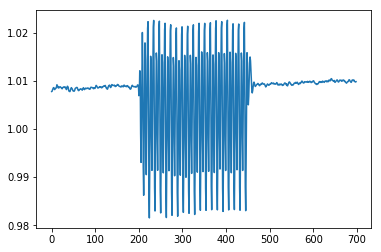

In [13]:
print("-------------------------------------------")
print("Key in logger:", Logger.log_dict.keys())
print("-------------------------------------------")

import matplotlib.pyplot as plt 
plt.switch_backend('Tkagg')
%matplotlib inline

plt.plot(logger().log_dict['s701a']['voltage'])